## Table of Contents:
* [Introduction](#Introduction)
* [Import Libraries](#import-libraries)
* [Selecting a Single Stock](#selecting_a_single_stock)
* [Fitting the Prophet model](#fit)
* [Residual Plot](#resid)
* [In-Sample Forecast](#IN)
* [OUT-Of-Sample Forecast](#OUT)
* [Accuracy Metrics](#acc_met)
* [Auto ARIMA Forecasting](#auto)

## Introduction <a class="anchor" id="Introduction"></a>

## Stock Price Forecasting with Prophet

## Importing the necessary libraries <a class="anchor" id="import-libraries"></a>

In [1]:
import pandas as pd
import datetime as dt
from datetime import datetime
from urllib.error import HTTPError
import re
import csv
import warnings
import numpy as np
import pickle
#import statsmodels.api as sm
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,plot_predict
import matplotlib.pyplot as plt
#from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.tsa.stattools import acf
#from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import kpss
#import pmdarima as pm
#import scipy.stats as stats
#from scipy.stats import boxcox
#from sklearn.metrics import mean_squared_error
import fbprophet
from prophet import Prophet

## Picking a single stock data<a class="anchor" id="selecting_a_single_stock"></a>

In [ ]:
with open('cons_cyc_df_years.pickle', 'rb') as handle:
    cons_cyc_df_years = pickle.load(handle)
cons_cyc_df_years

## Building Prophet model<a class="anchor" id="fit"></a>

In [67]:
amazon_cl = cons_cyc_df_years['AMZN'][['Close']]
amazon_return = cons_cyc_df_years['AMZN'][['Daily_Returns']]
amazon_cl

,Close
2006-01-03,47.58
2006-01-04,47.25
2006-01-05,47.65
2006-01-06,47.87
2006-01-09,47.08
...,...
2017-11-06,1120.66
2017-11-07,1123.17
2017-11-08,1132.88
2017-11-09,1129.13


In [ ]:
Fit Prophet Model

In [68]:
amazon_cl.reset_index(inplace=True)
amazon_cl = amazon_cl.rename(columns = {'index':'ds','Close':'y'})

In [71]:

# define the model
model = Prophet()
# fit the model
model.fit(amazon_cl)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/pallavibothra/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.271


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9271.43    0.00180819       1249.53           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9483.69     0.0122135       1922.77           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        9634.2   0.000785193       375.181           1           1      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       9662.18     0.0121764       916.496           1           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499          9731    0.00177852       1658.23      0.1529           1      560   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

## Make an In-sample Forecast <a class="anchor" id="IN"></a>

/Users/pallavibothra/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/pallavibothra/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


          ds         yhat  yhat_lower   yhat_upper
0 2017-10-03  1017.964709  987.468253  1048.790653
1 2017-10-04  1018.396683  986.502601  1050.772603
2 2017-10-05  1019.193480  988.176021  1050.910853
3 2017-10-06  1019.529510  988.912420  1050.793971
4 2017-10-09  1021.316772  988.288995  1049.519072


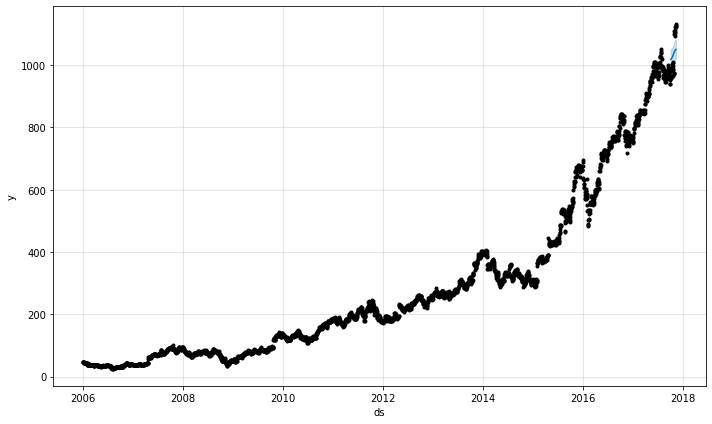

In [72]:
future = list()
date_list = amazon_cl['ds'].tail(30).tolist()
for i in range(1, 30):
    date = date_list[i]
    future.append([date])

future = pd.DataFrame(future)
future.columns = ['ds']
#future['ds']= to_datetime(future['ds'])
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
plt.show()

## Make an Out-Of-sample Forecast <a class="anchor" id="OUT"></a>

amazon_cl_train = amazon_cl.drop(amazon_cl.index[-30:])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/pallavibothra/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -86.8346
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9031.12      0.261814       9762.89           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9248.65     0.0478723       3335.78           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       9399.91    0.00545629       1709.65           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       9419.78    0.00027755       278.375           1           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        9444.5     0.0242538       2089.25           1           1      576   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/pallavibothra/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/pallavibothra/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


RMSE: 57.683


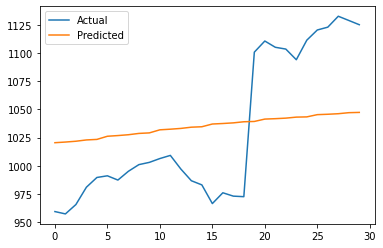

In [74]:
model_hold_out = Prophet()
# fit the model
model_hold_out.fit(amazon_cl_train)
date_list = amazon_cl['ds'].tail(30).tolist()
# define the period for which we want a prediction
future_hold_out = list()
for i in range(0, 30):
    date = date_list[i]
    future_hold_out.append([date])
future_hold_out = pd.DataFrame(future_hold_out)
future_hold_out.columns = ['ds']
# use the model to make a forecast
forecast_hold_out = model_hold_out.predict(future_hold_out)
# calculate MAE between expected and predicted values for december
y_true = amazon_cl['y'][-30:].values
y_pred = forecast_hold_out['yhat'].values
#mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(np.square(np.subtract(y_true,y_pred)).mean())
print('RMSE: %.3f' % rmse)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()